In [1]:
import numpy as np
import matplotlib.pyplot as plt

import naplib as nl

In [2]:
filepath = '../out_structs/out_struct_sample.mat'
out = nl.io.import_outstruct(filepath)
print(f'This out struct has data for {len(out)} trials')

This out struct has data for 18 trials


In [3]:
# corresponding STRFlab strfs
from hdf5storage import loadmat
strflab = loadmat('../out_structs/STRFLab_predictions_LIJ120clean.mat')
strflab['strf_cell'] = strflab['strf_cell'].squeeze()
strflab['strf_preds'] = strflab['strf_preds'].squeeze()
strflab['strf_corrs'] = strflab['strf_corrs'].squeeze()



In [4]:
# This out struct contains the fields 'aud' and 'resp', which give the stimulus and neural responses
print(f"aud stimulus shape for first trial : {out[0]['aud'].shape}")
print(f"response shape for first trial : {out[0]['resp'].shape}")

aud stimulus shape for first trial : (6047, 23)
response shape for first trial : (6047, 30)


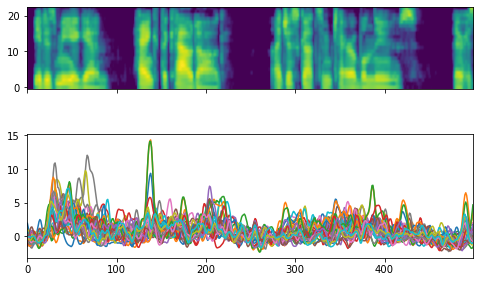

In [5]:
# Let's look at the first 5 seconds more closely

fig, axes = plt.subplots(2,1,figsize=(8,5), sharex=True)
axes[0].imshow(out[0]['aud'][:500].T, origin='lower', aspect=4)

axes[1].plot(out[0]['resp'][:500])
plt.show()

## Fit STRFs

Fit STRF models that have a receptive field of 400 ms in the past

In [6]:
tmin = 0 # receptive field begins at time=0
tmax = 0.4 # receptive field ends at a lag of 0.4 seconds
sfreq = 100 # sampling frequency of data

strf_model = nl.encoding.TRF(tmin, tmax, sfreq)


In [7]:
# first, we normalize the responses
out['resp'] = nl.preprocessing.normalize(outstruct=out, data='resp')

In [8]:
# train model on the first 16 trials 
out_train = out[:16]
out_test = out[16:]

### Fit STRFs with default model params

- 'Ridge' regularization, default set of alphas

In [9]:
# Now, fit the model to the training data. This model with contain
# 30 STRFs, one for each output channel in resp

strf_model.fit(outstruct=out_train, X='aud', y='resp')


Fitting model for output variable 0...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.2542
alpha=1.00e+03 : 0.2542
alpha=1.00e+04 : 0.2547
alpha=1.00e+05 : 0.2576
alpha=1.00e+06 : 0.2676
alpha=1.00e+07 : 0.2829
alpha=1.00e+08 : 0.2826
alpha=1.00e+09 : 0.2692
chose alpha=1.00e+07

Fitting model for output variable 1...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.2738
alpha=1.00e+03 : 0.2738
alpha=1.00e+04 : 0.2743
alpha=1.00e+05 : 0.2767
alpha=1.00e+06 : 0.2859
alpha=1.00e+07 : 0.3050
alpha=1.00e+08 : 0.2945
alpha=1.00e+09 : 0.2706
chose alpha=1.00e+07

Fitting model for output variable 2...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.2479
alpha=1.00e+03 : 0.2480
alpha=1.00e+04 : 0.2483
alpha=1.00e+05 : 0.2497
alpha=1.00e+06 : 0.2550
alpha=1.00e+07 : 0.2698
alpha=1.00e+08 : 0.2771
alpha=1.00e+09 : 0.2746
chose alpha=1.00e+08

Fitting model for output variable 3...
Running cross

Fitting model for output variable 26...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.0869
alpha=1.00e+03 : 0.0870
alpha=1.00e+04 : 0.0874
alpha=1.00e+05 : 0.0898
alpha=1.00e+06 : 0.0980
alpha=1.00e+07 : 0.1086
alpha=1.00e+08 : 0.1159
alpha=1.00e+09 : 0.1125
chose alpha=1.00e+08

Fitting model for output variable 27...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.1271
alpha=1.00e+03 : 0.1271
alpha=1.00e+04 : 0.1277
alpha=1.00e+05 : 0.1312
alpha=1.00e+06 : 0.1438
alpha=1.00e+07 : 0.1637
alpha=1.00e+08 : 0.1754
alpha=1.00e+09 : 0.1715
chose alpha=1.00e+08

Fitting model for output variable 28...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.1690
alpha=1.00e+03 : 0.1691
alpha=1.00e+04 : 0.1696
alpha=1.00e+05 : 0.1731
alpha=1.00e+06 : 0.1862
alpha=1.00e+07 : 0.2084
alpha=1.00e+08 : 0.2173
alpha=1.00e+09 : 0.2092
chose alpha=1.00e+08

Fitting model for output variable 29...
Running c

TRF(alpha=[100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0,
           1000000000.0],
    sfreq=100.0, tmax=0.4, tmin=0)

### Fit STRFs with different regularization

- 'Laplacian' regularization, modified range of alphas

In [10]:
# We can also change things like the regularization type, and even the range of
# regularization alphas for the cross-validation procedure. By default, the
# model is fit with 'ridge' regularization

strf_model_2 = nl.encoding.TRF(tmin, tmax, sfreq, reg_type='laplacian', alpha=np.logspace(2,10,8))
strf_model_2.fit(outstruct=out_train, X='aud', y='resp')


Fitting model for output variable 0...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.2531
alpha=1.39e+03 : 0.2534
alpha=1.93e+04 : 0.2555
alpha=2.68e+05 : 0.2639
alpha=3.73e+06 : 0.2791
alpha=5.18e+07 : 0.2829
alpha=7.20e+08 : 0.2752
alpha=1.00e+10 : 0.2653
chose alpha=5.18e+07

Fitting model for output variable 1...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.2730
alpha=1.39e+03 : 0.2733
alpha=1.93e+04 : 0.2748
alpha=2.68e+05 : 0.2805
alpha=3.73e+06 : 0.3000
alpha=5.18e+07 : 0.2963
alpha=7.20e+08 : 0.2747
alpha=1.00e+10 : 0.2680
chose alpha=3.73e+06

Fitting model for output variable 2...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.2472
alpha=1.39e+03 : 0.2473
alpha=1.93e+04 : 0.2483
alpha=2.68e+05 : 0.2515
alpha=3.73e+06 : 0.2649
alpha=5.18e+07 : 0.2754
alpha=7.20e+08 : 0.2753
alpha=1.00e+10 : 0.2736
chose alpha=5.18e+07

Fitting model for output variable 3...
Running cross

Fitting model for output variable 26...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.0855
alpha=1.39e+03 : 0.0858
alpha=1.93e+04 : 0.0877
alpha=2.68e+05 : 0.0955
alpha=3.73e+06 : 0.1031
alpha=5.18e+07 : 0.1112
alpha=7.20e+08 : 0.1153
alpha=1.00e+10 : 0.1106
chose alpha=7.20e+08

Fitting model for output variable 27...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.1246
alpha=1.39e+03 : 0.1249
alpha=1.93e+04 : 0.1276
alpha=2.68e+05 : 0.1392
alpha=3.73e+06 : 0.1561
alpha=5.18e+07 : 0.1716
alpha=7.20e+08 : 0.1743
alpha=1.00e+10 : 0.1700
chose alpha=7.20e+08

Fitting model for output variable 28...
Running cross-validation on alphas...
Cross-validation scores:
alpha=1.00e+02 : 0.1667
alpha=1.39e+03 : 0.1670
alpha=1.93e+04 : 0.1697
alpha=2.68e+05 : 0.1812
alpha=3.73e+06 : 0.2014
alpha=5.18e+07 : 0.2153
alpha=7.20e+08 : 0.2155
alpha=1.00e+10 : 0.2082
chose alpha=7.20e+08

Fitting model for output variable 29...
Running c

TRF(alpha=array([1.00000000e+02, 1.38949549e+03, 1.93069773e+04, 2.68269580e+05,
       3.72759372e+06, 5.17947468e+07, 7.19685673e+08, 1.00000000e+10]),
    reg_type='laplacian', sfreq=100.0, tmax=0.4, tmin=0)

## Analyze the STRFs

In [12]:
# compute correlation scores for the withheld test data

scores = strf_model.score(outstruct=out_test, X='aud', y='resp')
scores_2 = strf_model_2.score(outstruct=out_test, X='aud', y='resp')

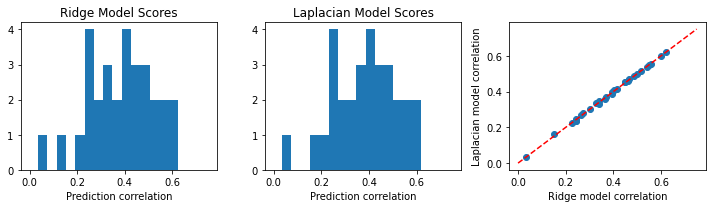

In [13]:
# compare the scores from each model's predictions

fig, axes = plt.subplots(1,3,figsize=(10,3), sharex=True)
axes[0].hist(scores, 15)
axes[0].set_xlabel('Prediction correlation')
axes[0].set_title('Ridge Model Scores')
axes[1].hist(scores_2, 15)
axes[1].set_xlabel('Prediction correlation')
axes[1].set_title('Laplacian Model Scores')
axes[2].scatter(scores, scores_2)
axes[2].set_xlabel('Ridge model correlation')
axes[2].set_ylabel('Laplacian model correlation')
axes[2].plot([0,0.75],[0,0.75],'r--')
plt.tight_layout()
plt.show()


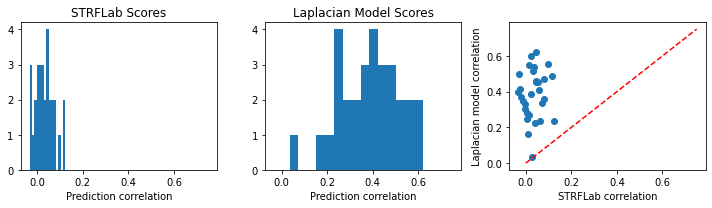

In [14]:
fig, axes = plt.subplots(1,3,figsize=(10,3), sharex=True)
axes[0].hist(strflab['strf_corrs'], 15)
axes[0].set_xlabel('Prediction correlation')
axes[0].set_title('STRFLab Scores')
axes[1].hist(scores_2, 15)
axes[1].set_xlabel('Prediction correlation')
axes[1].set_title('Laplacian Model Scores')
axes[2].scatter(strflab['strf_corrs'], scores_2)
axes[2].set_xlabel('STRFLab correlation')
axes[2].set_ylabel('Laplacian model correlation')
axes[2].plot([0,0.75],[0,0.75],'r--')
plt.tight_layout()
plt.show()

In [17]:
# we can access the STRF weights through the .coef_ attribute of the model
coef_ridge = strf_model.coef_
coef_laplacian = strf_model_2.coef_

print(f'STRF shape (num_outputs, frequency, lag) = {coef_ridge.shape}')


STRF shape (num_outputs, frequency, lag) = (30, 23, 40)


### Visualize the STRF for each electrode

We can see that the Laplacian-regularized model gives a smoother STRF

In [28]:
scores

array([0.39287119, 0.39654417, 0.36369798, 0.46032105, 0.24190796,
       0.44699336, 0.40338038, 0.49882983, 0.55886392, 0.34187401,
       0.24152288, 0.367628  , 0.34094385, 0.51547184, 0.44950021,
       0.32924177, 0.46661251, 0.48751954, 0.41405977, 0.54837384,
       0.59858052, 0.62231218, 0.54179473, 0.2280541 , 0.03528106,
       0.27093593, 0.15199215, 0.24245408, 0.30223146, 0.26455634])

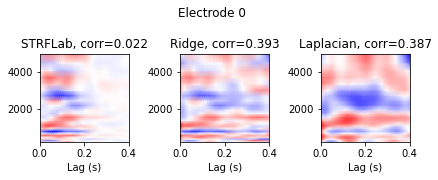

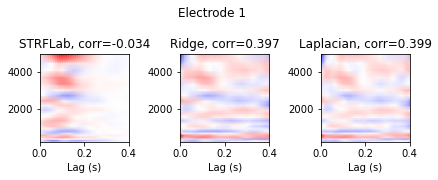

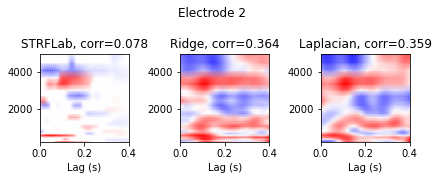

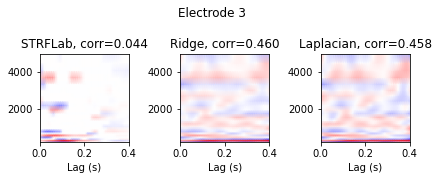

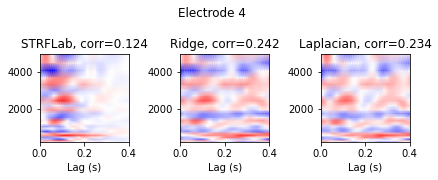

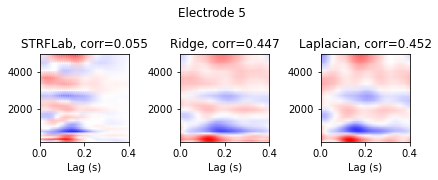

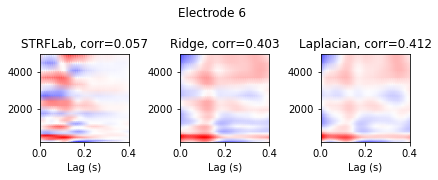

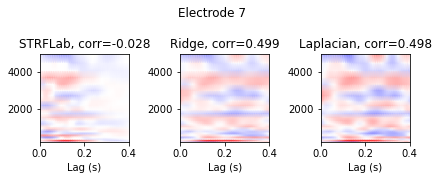

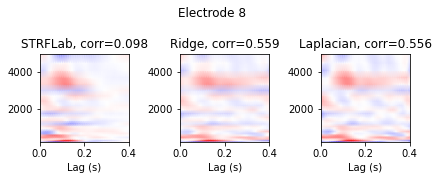

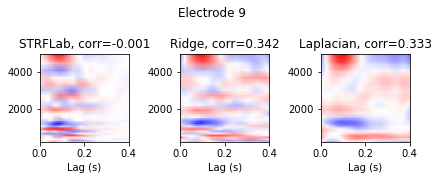

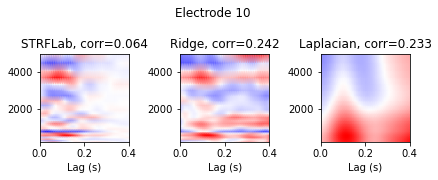

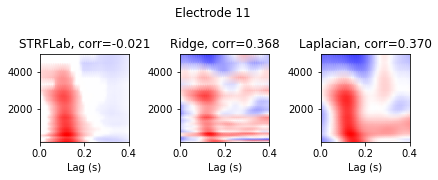

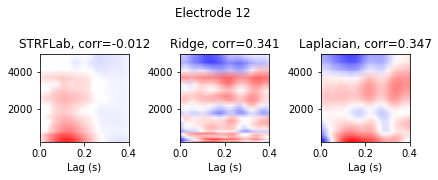

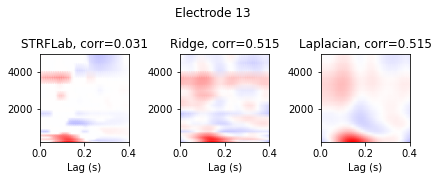

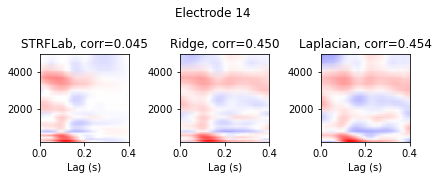

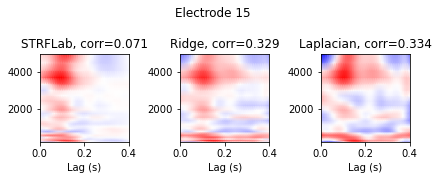

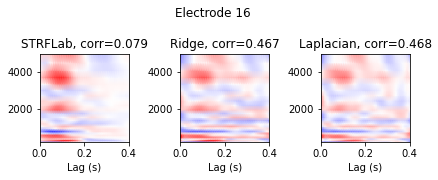

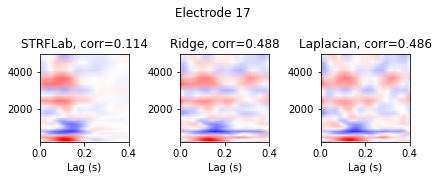

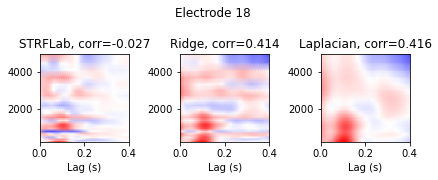

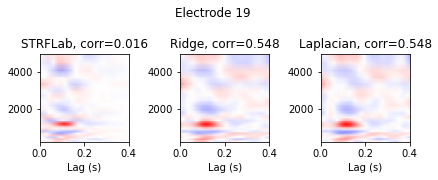

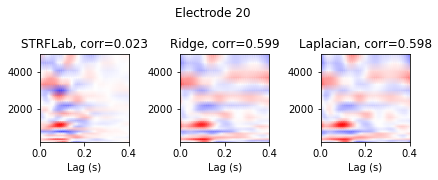

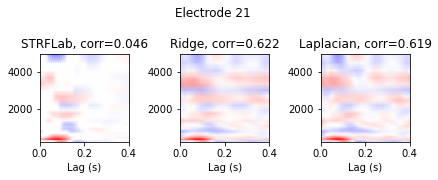

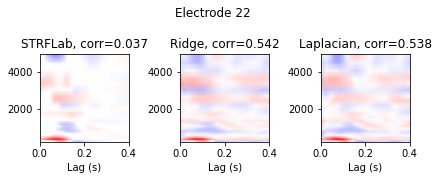

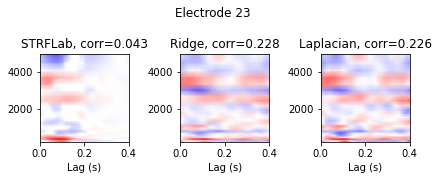

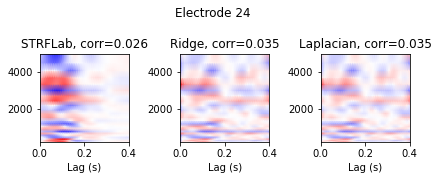

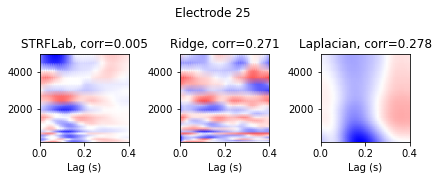

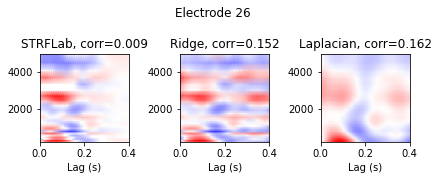

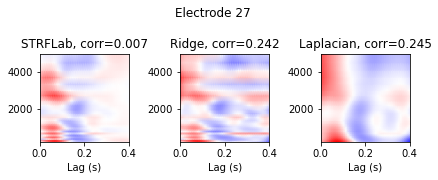

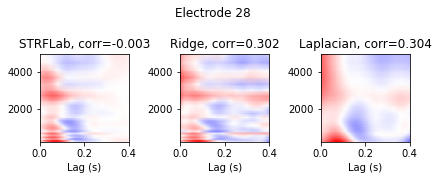

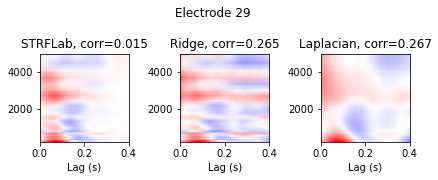

In [25]:
# Now, visualize the STRF weights for each electrode and for each model
from naplib.visualization import imSTRF

freqs = np.array([171.875, 250., 328.125, 421.875, 531.25, 640.625, 750., 890.625,
                  1031.25, 1171.875, 1343.75, 1531.25, 1734.375, 1937.5, 2187.5,
                  2437.5, 2718.75, 3015.625, 3359.375, 3718.75, 4109.375, 4531.25, 5000])

for elec, (model_1_coef, model_2_coef, score_model_1, score_model_2) in enumerate(zip(coef_ridge, coef_laplacian, scores, scores_2)):
    fig, axes = plt.subplots(1,3,figsize=(6,2.5))
    imSTRF(strflab['strf_cell'][elec].squeeze(), tmin=tmin, tmax=tmax, freqs=freqs, ax=axes[0])
    axes[0].set_title('STRFLab, corr={:2.3f}'.format(strflab['strf_corrs'][elec].squeeze()))
    
    imSTRF(model_1_coef, tmin=tmin, tmax=tmax, freqs=freqs, ax=axes[1])
    axes[1].set_title('Ridge, corr={:2.3f}'.format(score_model_1))
    imSTRF(model_2_coef, tmin=tmin, tmax=tmax, freqs=freqs, ax=axes[2])
    axes[2].set_title('Laplacian, corr={:2.3f}'.format(score_model_2))
    fig.suptitle(f'Electrode {elec}')
    fig.tight_layout()
    plt.show()
    
    

### Compute and Plot STRF Predictions

We see that the two STRF models have nearly identical predictions for most electrodes

In [26]:
predictions = strf_model.predict(outstruct=out_test, X='aud') # this is a list of the same length as out_test
predictions_2 = strf_model_2.predict(outstruct=out_test, X='aud')

# shapes of predictions for each trial 
print([x.shape for x in predictions])

[(2829, 30), (2836, 30)]


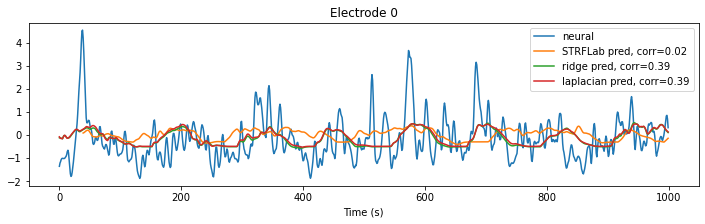

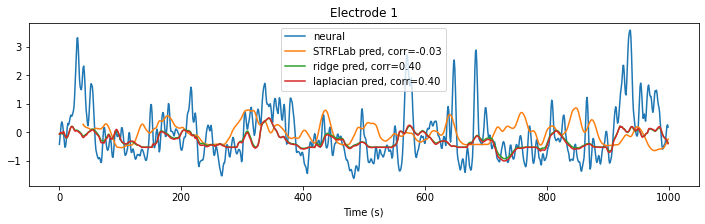

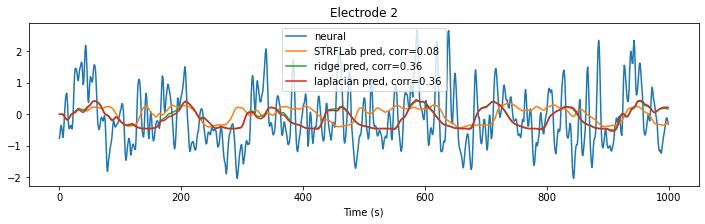

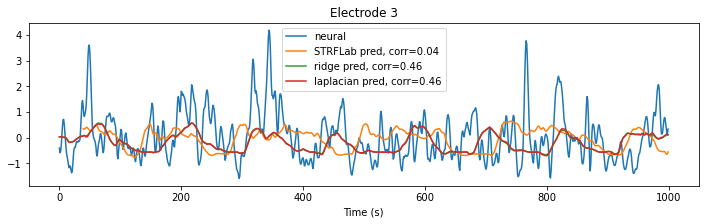

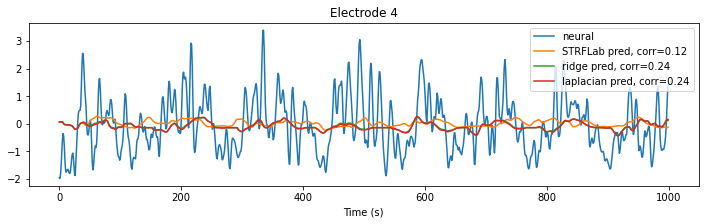

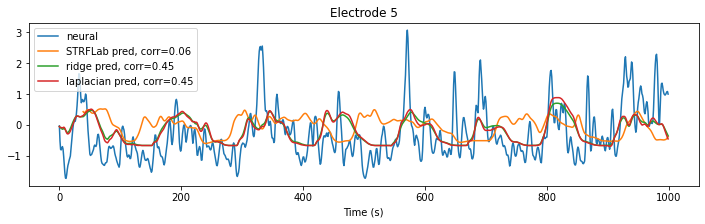

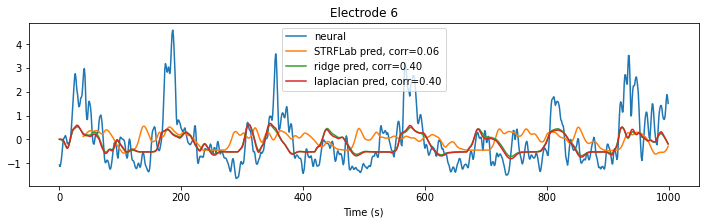

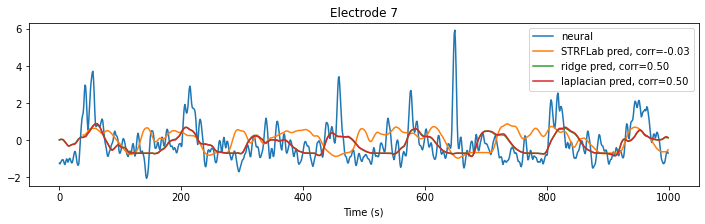

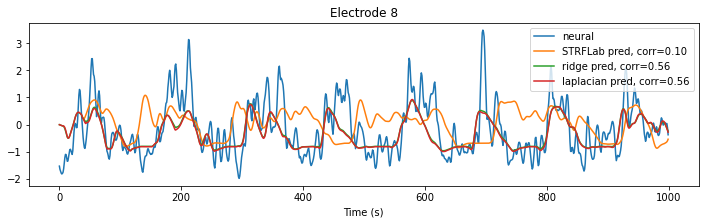

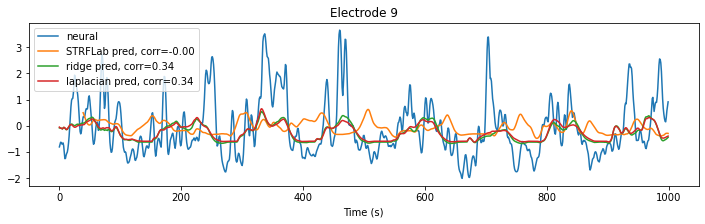

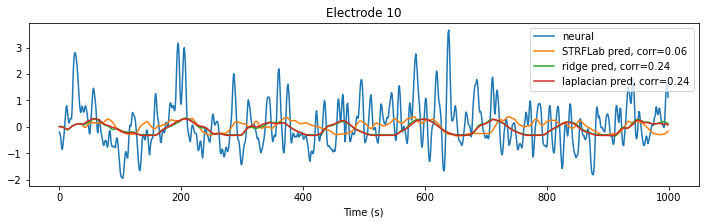

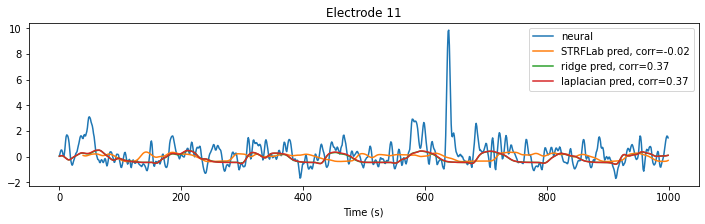

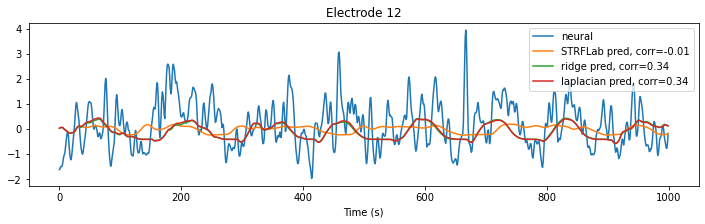

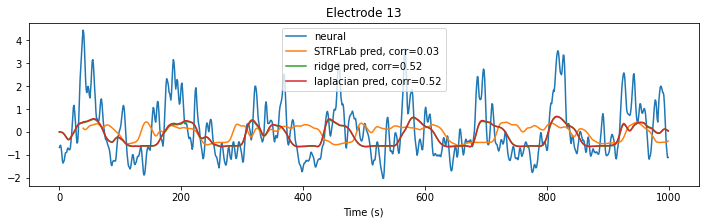

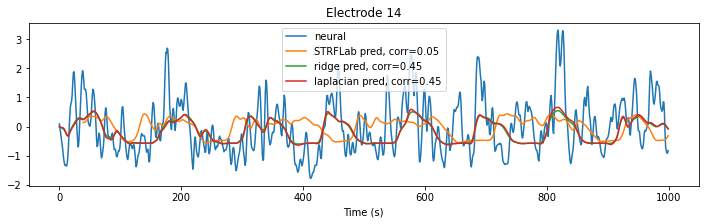

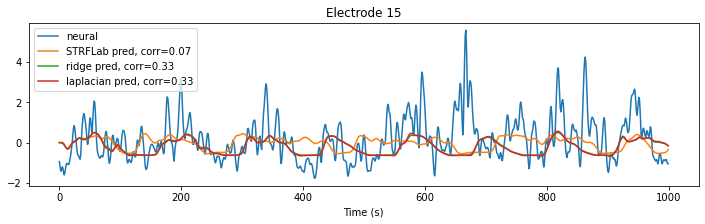

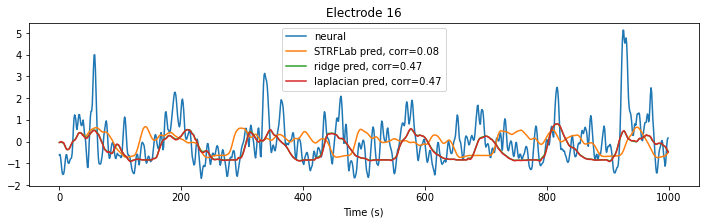

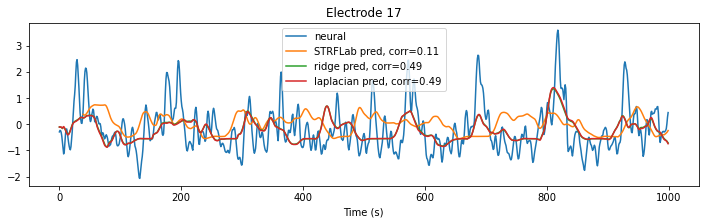

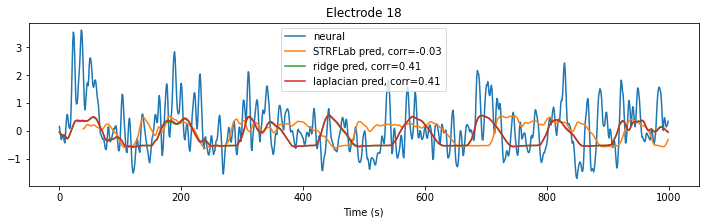

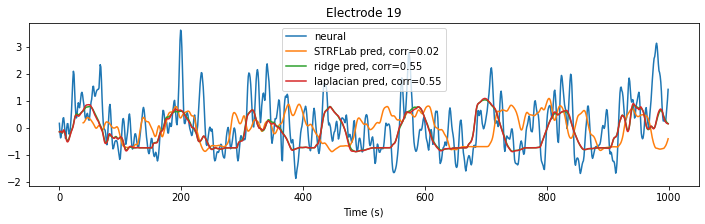

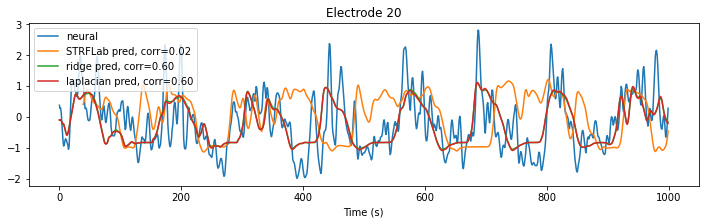

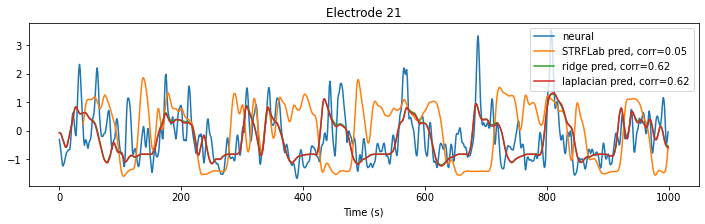

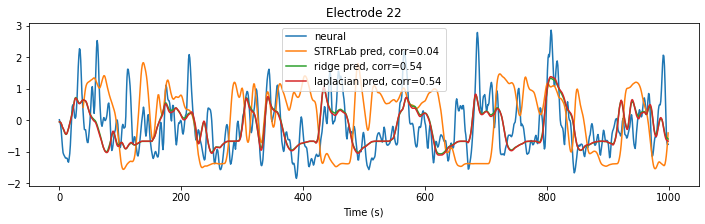

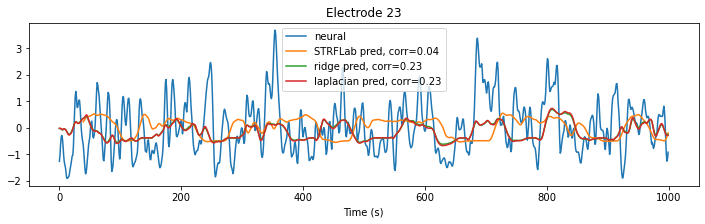

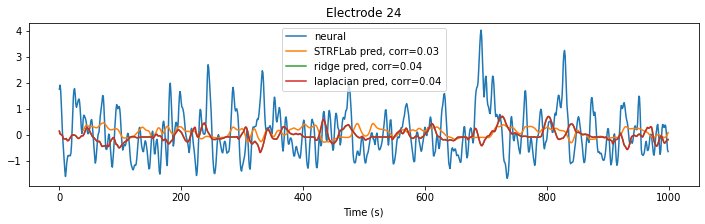

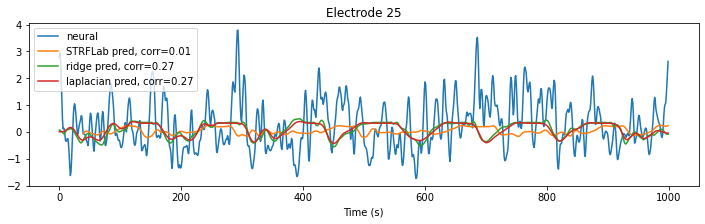

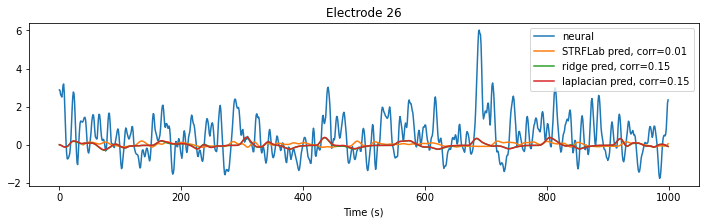

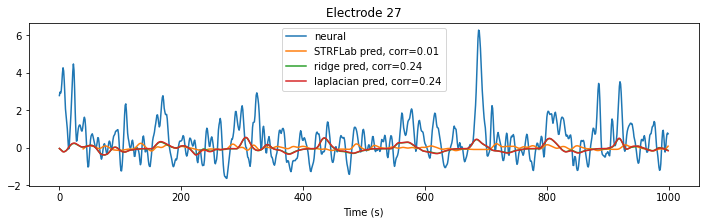

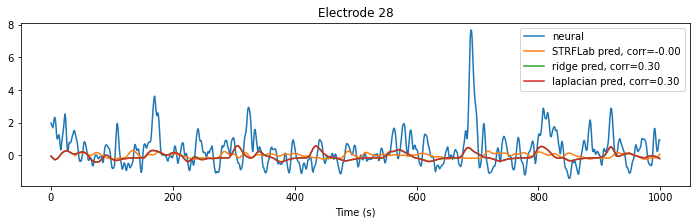

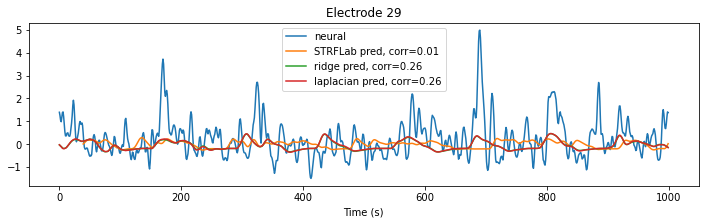

In [36]:
# plot the predictions for the first 10 seconds of the second-to-last trial for each electrode


max_time = 1000

for elec in range(predictions[0].shape[1]):

    plt.figure(figsize=(12,3))
    plt.plot(out_test['resp'][-2][:max_time,elec], label='neural')
    plt.plot(strflab['strf_preds'][elec].squeeze()[-2].squeeze()[:max_time], label='STRFLab pred, corr={:2.2f}'.format(strflab['strf_corrs'][elec].squeeze()))
    plt.plot(predictions[-2][:max_time,elec], label='ridge pred, corr={:2.2f}'.format(scores[elec]))
    plt.plot(predictions_2[-2][:max_time,elec], label='laplacian pred, corr={:2.2f}'.format(scores[elec]))
#     plt.xticks([0, 500, 1000], ['0', '5', '10'])
    plt.xlabel('Time (s)')
    plt.legend()
    plt.title(f'Electrode {elec}')
    plt.show()


